In [9]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p

from sklearn.feature_selection import SelectKBest, chi2


from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Read Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.drop(['id'], axis=1, inplace=True)
test_id = df_test['id']
df_test.drop(['id'], axis=1, inplace=True)
y = df_train['target']
df_train.drop(['target'], axis=1, inplace=True)

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,0.416,-2.177,-0.326,0.340,1.174,-0.245,-1.070,-0.336,-0.502,0.403,-0.605,-0.280,-1.618,0.878,-0.272,0.870,2.171,-0.214,0.477,-2.092,0.835,0.621,-2.810,1.029,-0.736,0.582,-0.079,0.493,1.359,-0.177,0.406,-0.163,1.341,0.754,0.491,-1.560,-0.520,0.766,0.216,-0.510,0.101,-0.602,-0.721,-0.545,1.564,2.003,-1.940,1.285,-0.987,-1.370,1.373,-0.495,0.113,-0.523,0.053,-0.888,0.249,0.687,1.363,0.169,-1.122,1.209,0.891,0.866,0.847,-1.110,1.224,-1.302,-1.647,-0.091,0.255,0.730,-0.380,0.294,-0.725,0.844,1.002,-1.267,-0.043,1.158,0.779,-0.733,-0.501,1.841,1.459,0.847,1.926,-0.316,0.044,-0.294,0.120,-1.050,0.730,-1.001,-0.321,0.407,0.469,0.445,1.632,0.273,1.557,1.196,-0.548,-0.275,0.179,0.584,-1.873,0.928,0.720,0.885,0.044,-1.131,-1.576,0.616,1.957,-0.518,1.494,1.573,-0.484,0.590,-0.387,0.388,-1.032,-0.841,0.288,-0.230,-2.714,-0.473,0.476,-1.352,-0.922,0.329,-0.558,0.787,-1.043,-0.130,0.517,2.445,0.847,-0.636,-0.324,0.753,0.058,-1.461,-0.820,-0.076,1.127,-0.496,1.020,0.279,0.262,-0.277,-0.166,-0.089,-1.696,-0.598,-0.710,-0.431,0.355,0.966,-1.150,-0.156,0.393,-0.117,0.444,0.948,-0.608,-0.106,-0.491,-0.608,1.565,1.013,-1.391,0.807,-0.607,-0.856,1.230,0.124,-0.336,1.758,-1.649,-1.429,-1.322,-1.501,2.125,-0.572,1.178,-1.451,-0.374,2.386,1.883,0.758,0.295,1.261,-0.837,0.140,-0.183,0.756,0.616,1.371,0.820,-0.702,-1.266,0.496,-0.669,-0.325,-0.170,0.147,-1.134,0.077,1.271,-0.087,-1.431,1.640,0.694,0.949,-2.400,0.657,-0.431,0.124,-0.335,-2.820,0.573,-0.755,3.798,-0.001,0.998,-0.543,1.018,0.883,-1.037,0.513,0.694,0.856,-0.523,0.596,0.971,0.279,2.684,-0.057,-1.754,0.297,-2.196,0.798,-0.533,-0.661,0.564,-2.400,0.945,-0.971,0.055,1.107,-0.848,-1.781,0.254,-0.515,0.234,0.296,-1.774,2.032,-0.442,-0.116,1.393,-0.494,-0.179,1.874,1.463,-1.397,0.284,0.336,0.551,0.557,-0.522,-0.503,-0.541,1.393,0.506,-1.420,-0.123,-1.833,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,0.542,0.424,-1.572,-0.968,-1.483,0.564,0.047,-0.324,-1.490,0.179,-0.524,0.250,2.462,0.029,-1.399,-2.370,-1.505,-1.294,0.106,-0.145,0.235,-1.045,1.335,1.254,-0.811,1.812,0.181,-0.020,1.125,0.279,-0.682,1.161,1.194,0.243,1.179,1.338,-1.000,-0.362,-0.605,1.917,-1.157,0.394,-0.482,1.591,0.106,-0.959,0.600,-1.147,-1.064,3.080,1.057,0.947,-1.125,1.288,-0.171,1.124,-0.454,0.698,-0.028,2.208,0.014,0.872,2.286,-0.822,0.416,1.486,-0.331,-0.993,-0.071,0.543,-0.096,0.041,0.138,1.110,0.692,1.407,-0.234,-1.899,-0.131,0.934,0.802,-1.041,2.004,1.424,0.423,-0.352,-0.656,-0.053,1.036,-1.228,-0.854,-0.748,1.180,0.575,-1.472,-1.215,-0.889,0.004,-0.145,-0.933,-0.713,0.869,0.539,-0.911,-0.638,0.895,-1.896,-0.604,0.312,1.883,-0.292,-0.849,-0.453,0.894,0.339,2.095,0.336,1.290,0.057,-0.159,0.539,0.675,-1.015,-0.304,-1.301,-0.614,-1.176,0.117,0.075,-0.088,1.888,-0.119,0.434,0.135,1.779,0.554,-0.622,-1.214,0.389

In [4]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,-1.380,0.001,-1.340,-0.371,-0.735,-0.545,-0.525,-1.139,1.263,-0.240,0.931,-1.151,0.938,0.720,-1.543,-1.467,0.402,0.538,0.614,-0.318,-1.417,0.471,-1.139,2.294,-0.577,-0.190,-1.252,-1.708,0.415,-1.450,2.212,0.669,2.079,-1.006,-0.867,1.165,1.110,-0.419,-0.807,0.464,1.571,0.039,0.043,-0.612,0.185,0.517,0.729,-2.804,-0.554,1.769,-1.160,0.955,-0.231,-0.516,0.801,-0.525,-0.059,0.325,-0.573,0.435,-0.070,0.784,0.225,-0.208,-0.351,0.974,-1.421,-1.123,0.515,0.513,-0.448,0.275,0.467,-0.059,0.009,0.861,-0.686,2.235,-1.073,-0.274,-0.100,0.227,0.611,-1.071,0.243,0.190,0.145,-0.570,-0.087,0.970,-0.361,-0.181,0.541,-0.788,-2.268,-0.658,-0.311,0.368,-1.165,1.190,0.199,-0.221,-0.383,1.673,-0.464,0.110,-0.430,0.421,0.312,-1.152,-0.813,-0.616,-0.027,-0.965,-0.507,0.877,1.684,-0.991,0.876,-0.047,-2.067,-0.437,-0.669,0.108,-0.272,1.407,-0.818,0.598,-0.937,0.334,-0.716,0.422,1.704,0.127,0.011,0.286,0.409,-1.016,-0.048,-0.260,-0.400,1.283,1.241,-0.089,0.063,0.649,-0.487,-0.991,-1.020,0.131,0.846,-0.408,0.825,-0.467,0.574,-0.278,0.102,0.246,0.744,-0.372,-0.327,1.845,0.740,-1.020,0.348,1.971,0.082,-0.229,-1.568,-0.607,0.041,-0.651,-0.520,1.745,0.104,0.593,-1.698,-0.683,1.136,1.567,1.478,-0.337,1.293,2.484,0.797,-0.368,-1.978,1.218,0.264,0.348,-1.129,-2.029,-0.304,-1.632,1.238,-1.154,1.640,-0.201,-0.618,1.022,2.440,-0.477,1.804,-0.136,-1.015,-0.145,-2.786,0.166,0.513,0.894,-0.109,-0.033,-2.857,-0.820,0.444,-0.574,-0.329,0.287,0.258,-0.801,0.827,0.688,-0.478,0.657,1.837,0.837,-0.585,0.636,0.733,-1.180,-1.796,0.044,-0.965,0.273,0.077,-0.097,-1.518,0.514,-0.439,-0.292,-0.207,1.309,-1.055,0.987,0.979,-0.805,2.190,0.451,0.200,-1.133,0.029,0.188,-0.756,-0.542,-0.231,0.306,-0.680,0.727,1.372,0.794,-0.930,0.652,-0.398,-0.236,1.621,0.089,-0.282,0.170,0.514,-0.321,1.038,-0.336,-1.170,0.245,-0.032,0.227,1.757,-1.513,-1.058,-0.559,0.664,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,0.584,2.620,1.373,0.257,0.322,-0.009,1.844,0.576,0.686,0.095,-0.906,-0.773,-0.781,-0.659,-1.284,-0.922,-0.097,-0.464,-0.277,-0.320,0.330,-0.780,1.050,2.206,-0.587,1.220,1.350,-0.779,-0.160,0.119,-0.029,-0.089,-0.219,-0.678,-1.141,-0.767,-1.287,0.085,0.290,0.222,2.432,-0.965,0.936,2.664,-1.480,1.851,-0.152,-0.378,0.643,-0.346,0.255,0.182,0.233,-0.271,-1.051,0.678,0.511,-2.332,-0.790,-0.253,-1.634,-2.158,-0.294,2.047,0.576,1.016,0.188,-0.431,-2.345,1.040,0.483,1.121,-0.950,1.239,-0.174,1.087,1.272,-1.891,0.947,0.318,-2.126,-0.395,0.151,1.001,-0.107,1.431,1.247,1.235,-0.470,0.871,0.523,0.260,0.855,0.132,1.574,1.343,1.578,1.584,-0.193,1.404,-0.900,-1.515,0.189,-0.232,1.472,1.251,2.355,-0.430,0.061,0.382,1.250,1.676,0.445,-2.140,0.664,0.560,0.180,0.419,0.065,-0.299,0.068,1.281,-0.365,-0.047,-2.473,0.699,-0.421,-1.526,-0.202,-0.613,0.138,-0.988,0.696,-0.194,-0.191,0.282,-1.424,0.222,-0.2

In [5]:
print(df_train.shape)
print(df_test.shape)

(250, 300)
(19750, 300)


In [10]:
nul = 0
for col in df_train.columns:
    if(df_train[col].isnull().any()):
        print(col,'has null values')
        nul = 1
if(nul==0):
    print('There is no Null value present')

There is no Null value present


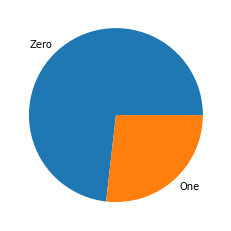

In [16]:
ones = 0
zeros = 0
for i in y:
    if i == 0:
        zeros += 1
    else:
        ones += 1
data = [zeros, ones]
labels = ["Zero", "One"]
plt.pie(data, labels=labels)
plt.show()

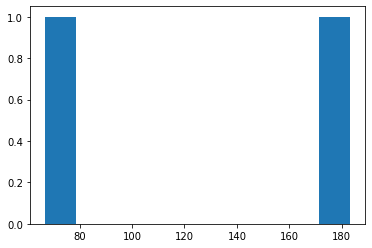

[183, 67]


In [27]:
plt.hist(data, orientation='vertical')
plt.show()
print(data)

In [28]:
def feature_egnineering(data, test):
  #Features with skewness>0.3 OR skewness<-0.3
  bf = list()
  for i in data.columns:
      skew = data[i].skew()
      if(skew>0.3 or skew<-0.3):
          bf.append((i,skew))
  print('Number of Features for binning: ', len(bf))
  print('Features for with their skewness: ', bf)
  bf = dict(bf)

  #Quartile based adaptive binning of above skewed features 
  for col in bf.keys():
      quantile_list = [0, .25, .5, .75, 1.]
      quantiles = data[col].quantile(quantile_list)
      quantile_labels = [0, 1, 2, 3]
      data['Quantile_binning_'+col] = pd.qcut(data[col], q=quantile_list, labels=quantile_labels)
      test['Quantile_binning_'+col] = pd.qcut(test[col], q=quantile_list, labels=quantile_labels)
  return data, test

In [30]:
df_train, df_test =  feature_egnineering(df_train, df_test)

Number of Features for binning:  13
Features for with their skewness:  [('19', 0.3417540224702536), ('50', 0.3304914858363826), ('63', 0.3020252402503201), ('138', -0.3796836690773351), ('148', 0.31131243550821036), ('186', -0.3309124373536452), ('196', -0.3786493648919739), ('197', -0.4352323263860756), ('206', 0.3564648572393996), ('220', -0.34575514854897316), ('240', -0.4889114906320757), ('242', -0.370396718503478), ('272', 0.4864285153563513)]


In [31]:
LR = LogisticRegression(class_weight='balanced')
LR.fit(df_train, y)

LogisticRegression(class_weight='balanced')

In [32]:
y_pred = LR.predict(df_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [34]:
for i in y_pred:
    if i != 0:
        print(i)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [36]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['target'] = y_pred
sub.to_csv('submission.csv', index=False)

In [6]:
all_data = pd.concat([df_train, df_test], axis=0, sort=False)

In [7]:
new_data = SelectKBest(chi2, k=10).fit_transform(df_train, y)

ValueError: Input X must be non-negative.

In [8]:
df_train.corr().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,1.000000,0.039939,0.069846,-0.139829,0.079360,-0.063259,-0.071990,0.016923,0.043081,0.051027,-0.071284,0.102536,0.024741,-0.085392,-0.072575,-0.052386,0.101609,-0.090942,-0.082987,0.012760,0.108564,-0.048470,-0.026788,0.068669,-0.008968,0.000571,0.024335,-0.057842,-0.007959,-0.120533,0.189167,-0.084319,0.045269,0.045945,0.064102,0.016478,0.006133,-0.036302,0.007015,0.029471,-0.037145,-0.051332,0.059802,-0.003448,-0.015793,0.042161,0.035292,0.019058,0.160281,0.086370,0.009861,0.080075,-0.050481,-0.034145,-0.015674,0.083590,0.015704,0.061057,-0.065019,-0.038384,0.034901,0.095196,0.015885,-0.048997,-0.019286,-0.019175,0.071261,-0.105325,-0.112880,0.019004,0.103213,0.036209,-0.074687,0.009866,-0.010709,0.101130,0.051762,0.029433,-0.036038,0.043978,0.100678,-0.121456,0.146185,0.022302,-0.011522,-0.054655,0.148995,-0.006285,-0.098980,-0.091488,0.038258,0.003324,-0.002660,-0.013651,-0.022056,0.002106,-0.072291,-0.084423,-0.072761,-0.087512,0.047694,0.045422,0.043098,0.042695,-0.022223,0.044747,-0.057303,-0.021737,-0.045128,0.070417,0.093744,0.008383,0.027823,0.018269,-0.085170,0.040077,0.077962,0.000460,-0.047442,0.048114,-0.090106,-0.045955,0.076690,-0.051096,-0.045116,0.055692,0.040588,-0.078124,0.017260,0.037673,0.045440,0.036397,-0.051156,0.045904,0.132503,-0.035719,-0.019110,-0.075402,-0.048805,-0.010084,-0.002806,0.030250,0.062507,0.047644,0.078416,0.091940,0.045920,-0.060337,-0.084904,-0.085748,0.048053,0.054003,-0.046513,0.038720,0.033548,0.006159,-0.063597,0.033744,-0.064188,-0.024789,-0.004082,-0.036763,0.018123,0.004068,0.062520,-0.035160,0.079399,0.048741,0.076044,-0.073207,0.016932,0.003563,0.073638,-0.106804,0.016225,-0.011569,-0.001128,0.021998,0.052294,-0.024335,0.027738,0.125342,0.046813,-0.099106,0.023929,0.099867,-0.035668,0.071961,-0.012917,0.141316,-0.050982,-0.003827,-0.058813,-0.024222,0.007681,-0.019615,-0.054132,0.014911,-0.064796,0.071983,0.034691,0.090033,0.017072,-0.086669,0.033647,0.044718,0.032016,0.112669,-0.026740,-0.062930,-0.103808,-0.004816,-0.007475,-0.060011,-0.021173,0.022658,0.050348,-0.106941,0.057820,-0.063629,0.098055,-0.008852,-0.085778,-0.009961,-0.001868,-0.027696,0.050493,0.031753,0.091143,0.009928,-0.119620,0.023676,0.062851,0.140481,-0.002485,0.022080,0.003939,-0.134741,-0.010690,0.003055,0.071355,0.041662,-0.035185,-0.033237,-0.034959,0.009124,-0.022206,-0.079395,0.021536,0.020798,-0.040830,0.061885,0.074498,0.008790,-0.017371,0.053754,0.153728,-0.009487,0.009441,0.068208,0.059136,-0.017628,0.135872,-0.022731,-0.035035,-0.038086,0.020927,0.105280,0.038145,0.009209,0.126129,-0.042860,0.023981,-0.006140,-0.041691,-0.040874,-0.033936,0.099698,-0.068735,-0.011505,-0.062200,-0.037515,-0.002699,-0.036585,-0.006548,0.054054,0.011765,-0.027016,-0.086296,0.033837,-0.022926,-0.052895,-0.020901,-0.012124,-0.007601,0.041362,0.009961,-0.002739,0.092893,0.065807
1,0.039939,1.000000,0.023237,-0.096873,-0.052313,0.048742,-0.08688

In [7]:
i = np.array(y)
i.reshape(-1, 1)

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [8]:
df_train.drop(['target'], axis=1, inplace=True)
df_train.shape

(250, 300)

In [9]:
model = Lasso(alpha=0.031, tol=0.01, random_state=10, selection='random')
model.fit(df_train, i)

Lasso(alpha=0.031, random_state=10, selection='random', tol=0.01)

In [10]:
y.shape

(250,)

In [11]:
u = model.predict(df_train)
u

array([ 0.49692625,  0.13847555,  0.20748891,  0.53186202,  0.00860504,
        0.08255497,  0.57684171,  0.16696836,  0.50422691,  0.14080262,
        0.15889107,  0.18302981,  0.27294667,  0.16434236,  0.32330731,
        0.25667491,  0.288909  ,  0.59503445,  0.10263968,  0.63054711,
       -0.09857003, -0.04713519,  0.05031644,  0.32106136,  0.07865209,
        0.34169379,  0.06305986,  0.49783331,  0.54591161,  0.1815578 ,
        0.45652016,  0.35809517,  0.50504243,  0.30408226,  0.43030179,
        0.10061796,  0.50177085,  0.19538462,  0.30523435,  0.08442834,
       -0.08465546,  0.08429208,  0.18490179, -0.11091447,  0.54527287,
        0.11627029,  0.08767853,  0.34444703,  0.19486696,  0.10820469,
        0.13954592,  0.2231831 ,  0.272407  ,  0.47795225,  0.7128914 ,
       -0.0067204 ,  0.24462547,  0.38484319, -0.04599746,  0.4171915 ,
        0.1720817 , -0.00236404,  0.15226344,  0.35267615,  0.47527935,
       -0.03110942,  0.28330375,  0.19251425,  0.4439366 ,  0.13

In [12]:
y

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
245    1.0
246    0.0
247    0.0
248    1.0
249    0.0
Name: target, Length: 250, dtype: float64

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20)
rf.fit(df_train, i)

RandomForestClassifier(max_depth=20)

In [14]:
# o = rf.predict(df_train)
# o

array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [15]:
# accuracy_score(o, i)

1.0

In [16]:
# t = model.predict(df_test)
# t.shape

(19750,)

In [17]:
# for k in range(len(t)):
#     if t[k] >= 0.5:
#         t[k] = 1
#     else:
#         t[k] = 0
# t

array([1., 0., 0., ..., 0., 0., 0.])

In [18]:
# sub = pd.DataFrame()
# sub['id'] = test_id
# sub['target'] = t
# sub.to_csv("firstsublasso.csv", index=False)